In [53]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re,string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
df = pd.read_csv('spam.csv', encoding= 'Latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [56]:
df.rename(columns={'v1':'Category', 'v2':'Message'},inplace=True)
df.sample(5)

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
852,ham,No da if you run that it activate the full ver...,NaN,NaN,NaN
3396,ham,Heehee that was so funny tho,NaN,NaN,NaN
2531,ham,What's happening with you. Have you gotten a j...,NaN,NaN,NaN
1232,ham,1's finish meeting call me.,NaN,NaN,NaN
3923,ham,How? Izzit still raining?,NaN,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
df.isnull().sum()

Category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [59]:
df.duplicated().sum()

403

In [60]:
df= df.drop_duplicates()

In [61]:
df.duplicated().sum()

0

In [62]:
df.describe()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5169,5169,43,10,5
unique,2,5169,43,10,5
top,ham,"Go until jurong point, crazy.. Available only ...",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,4516,1,1,1,1


In [63]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [64]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [65]:
encoder =LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])


In [66]:
df.head(10)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   int64 
 1   Message   5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [68]:
#df['Message'] = df['Message'].astype(str)
#df['Category'] = df['Category'].astype(str)

In [69]:

df.groupby('Category').count()

,Message
Category,
0,4516
1,653


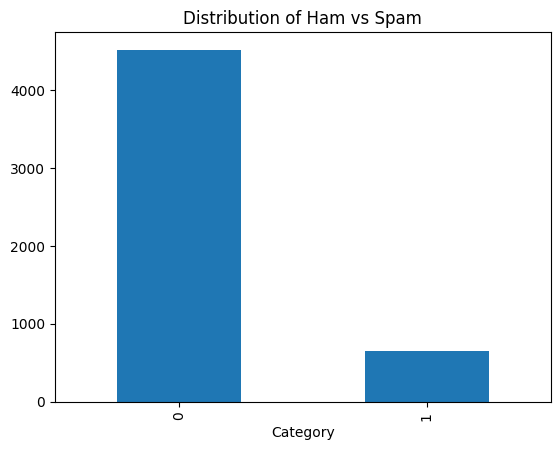

In [70]:
df.groupby('Category').Category.count().plot.bar()
plt.title('Distribution of Ham vs Spam')
plt.show()

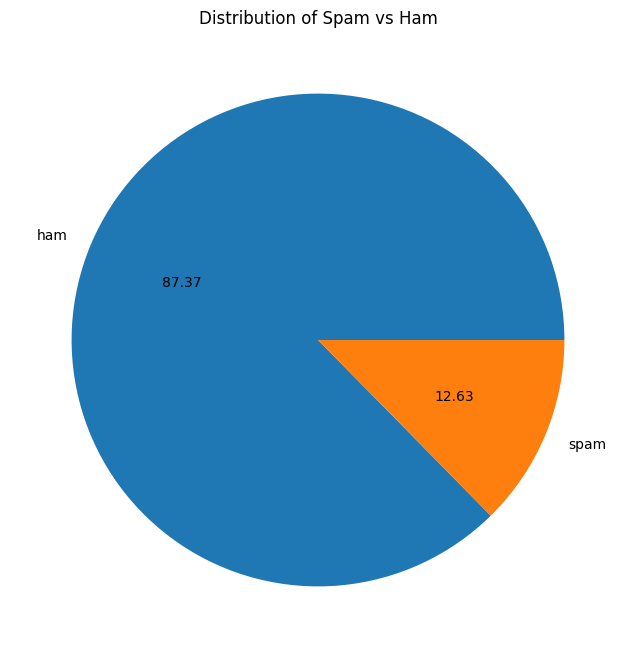

In [71]:
df['Category'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.title('Distribution of Spam vs Ham')
plt.show()

In [72]:
df['num_char'] = df['Message'].apply(len)
df

,Category,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [73]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,Category,Message,num_char,num_words
2294,1,You have 1 new message. Please call 08718738034.,48,10
2206,1,"URGENT! Your mobile No 07xxxxxxxxx won a å£2,0...",159,31
3675,0,Hey r Ì_ still online? I've finished the forma...,54,12
776,0,Why don't you go tell your friend you're not s...,145,31
56,1,Congrats! 1 year special cinema pass for 2 is ...,161,37


In [74]:
df['num_sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,Category,Message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [75]:
#Histogram

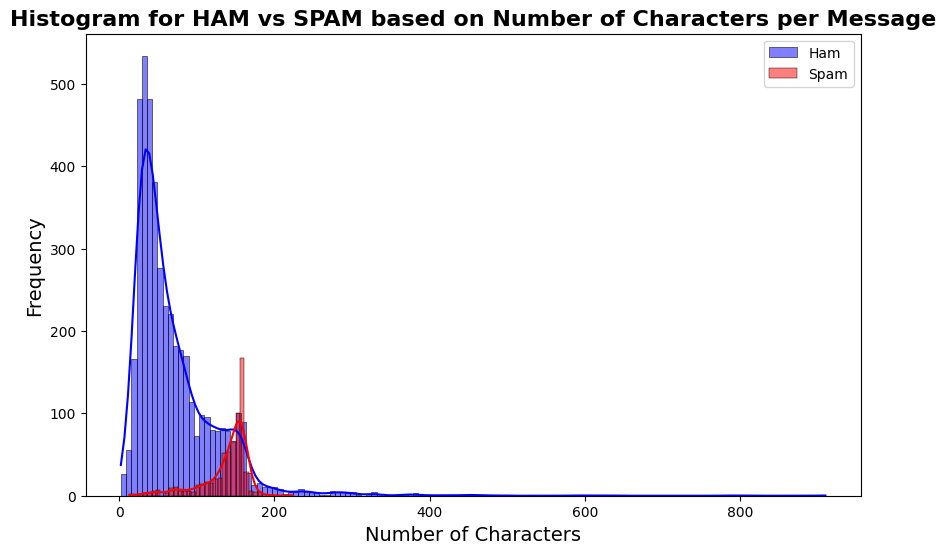

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Category'] == 0]['num_char'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['Category'] == 1]['num_char'], color='red', label='Spam', kde=True)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram for HAM vs SPAM based on Number of Characters per Message', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

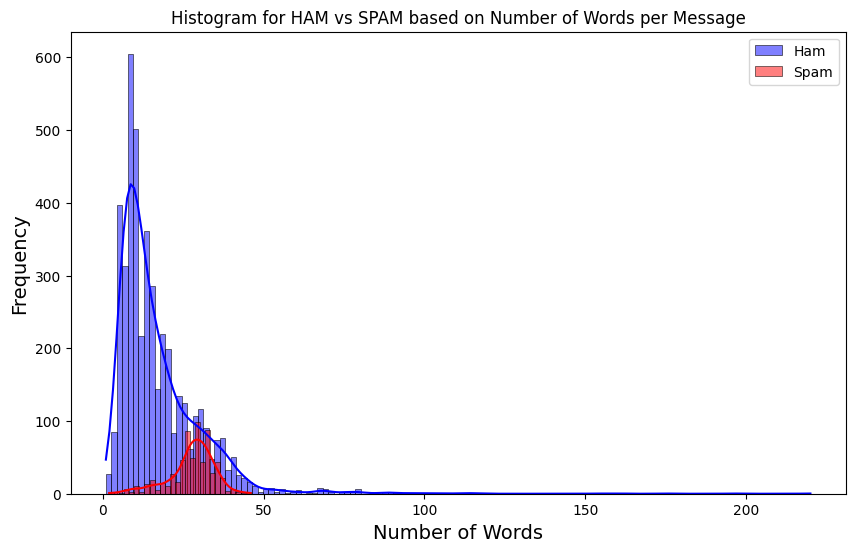

In [77]:
plt.figure(figsize=(10,6))
plt.title("Histogram for HAM vs SPAM based on Number of Words per Message")
sns.histplot(df[df['Category'] == 0]['num_words'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['Category'] == 1]['num_words'], color='red', label='Spam', kde=True)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

In [78]:
#Text Cleaning

In [79]:
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
from nltk.stem.porter import PorterStemmer
stemmer =PorterStemmer()

In [82]:
df['Cleaned'] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]),df['Message']))
df['Cleaned'] = df['Cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,Category,Message,num_char,num_words,num_sentences,Cleaned
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,thi nd time tri contact u u pound prize claim ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,will b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood so suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,the guy bitch i act like interest buy someth e...


In [83]:
df.drop(columns={'num_char','num_words','num_sentences'}, inplace=True)

In [84]:
df

,Category,Message,Cleaned
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,thi nd time tri contact u u pound prize claim ...
5568,0,Will Ì_ b going to esplanade fr home?,will b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood so suggest
5570,0,The guy did some bitching but I acted like i'd...,the guy bitch i act like interest buy someth e...


In [85]:
df.to_csv('Cleaned_spam.csv')

In [86]:
#Word Cloud

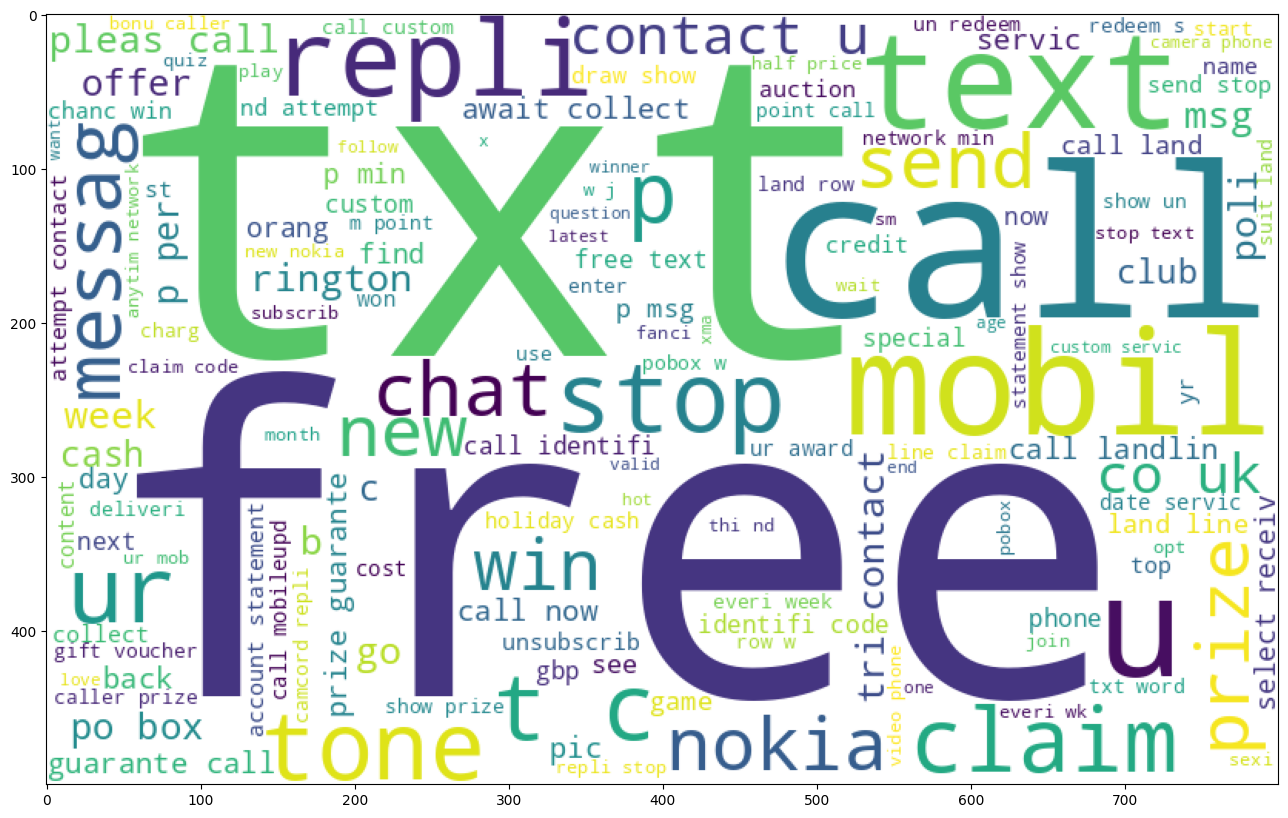

In [87]:
#1. For Spam Messages
wc=WordCloud(width=800,height=500,min_font_size=10,max_words=1000,background_color='white')
spam_wc=wc.generate(df[df['Category']==1]['Cleaned'].str.cat(sep=""))
plt.figure(figsize=(16,10))
plt.imshow(spam_wc)

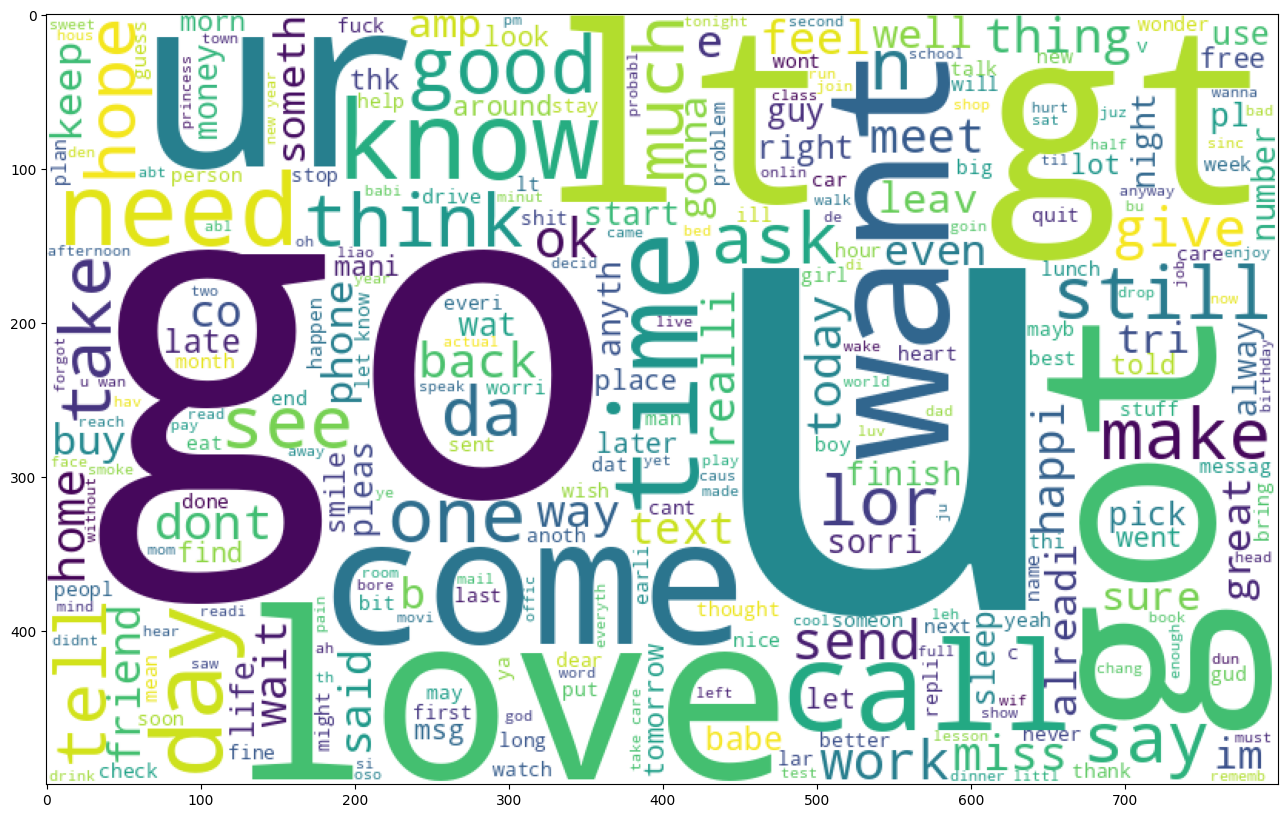

In [88]:
#2. For ham Messages
wc=WordCloud(width=800,height=500,min_font_size=6,max_words=1000,background_color='white')
ham_wc=wc.generate(df[df['Category']==0]['Cleaned'].str.cat(sep=""))
plt.figure(figsize=(16,10))
plt.imshow(ham_wc)

In [89]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [90]:
#Splitting dataset into X and y
X = df['Cleaned']
y = df['Category']

In [91]:
#Splitting dataset into train and test sets
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [92]:
#1. LOGISTIC REGRESSION

In [93]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()

pipeline1 = Pipeline([('vect', tfidf),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])


In [94]:
lr_model = pipeline1.fit(X_train, y_train)

In [95]:
lr_pred = lr_model.predict(X_test)
lr_train_pred = lr_model.predict(X_train)
print("Test accuracy = ",accuracy_score(y_test,lr_pred))
print("Train accuracy = ",accuracy_score(y_train,lr_train_pred))
print('\n')

Test accuracy =  0.965183752417795
Train accuracy =  0.9729141475211608




              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       0.98      0.75      0.85       138

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

[[894   2]
 [ 34 104]]


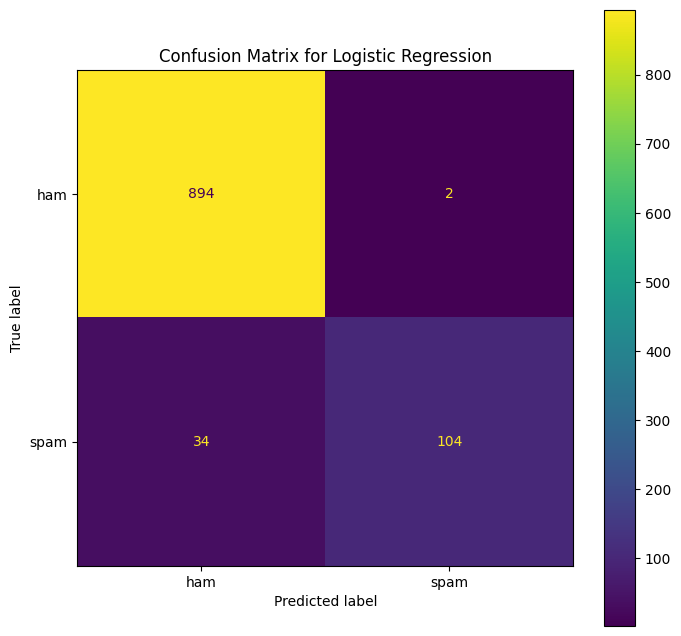

In [96]:
# confusion matrix and classification report of Logistic Regression
ytest = np.array(y_test)
print(classification_report(ytest,lr_model.predict(X_test)))
print(confusion_matrix(ytest,lr_model.predict(X_test)))
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,lr_model.predict(X_test))
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['ham','spam']
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
ax.set(title='Confusion Matrix for Logistic Regression')
display.plot(ax=ax);

In [97]:
#2. SUPPORT VECTOR MACHINE

In [98]:
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')


In [99]:
pipeline2 = Pipeline([('vect', tfidf),
                     ('classifier', SVC())])

In [100]:
svc_model = pipeline2.fit(X_train,y_train)

In [101]:
svc_pred = svc_model.predict(X_test)
svc_train_pred = svc_model.predict(X_train)
print("Test accuracy = ",accuracy_score(y_test,svc_pred))
print("Train accuracy = ",accuracy_score(y_train,svc_train_pred))
print('\n')

Test accuracy =  0.9748549323017408
Train accuracy =  0.9975816203143894




              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034

[[894   2]
 [ 24 114]]


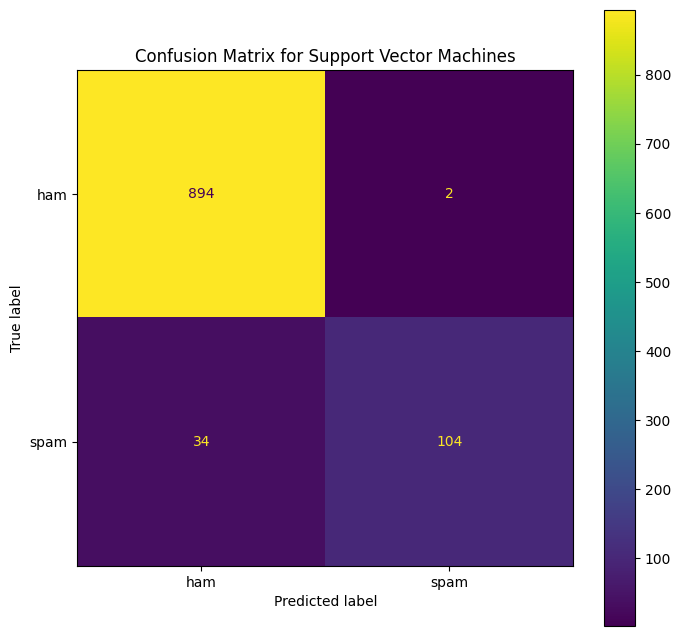

In [102]:
# confusion matrix and classification report of Support Vector Machine
ytest = np.array(y_test)
print(classification_report(ytest,svc_model.predict(X_test)))
print(confusion_matrix(ytest,svc_model.predict(X_test)))
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,lr_model.predict(X_test))
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['ham','spam']
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
ax.set(title='Confusion Matrix for Support Vector Machines')
display.plot(ax=ax);

In [103]:
#Predicting Spam or Ham after getting input from user

message1 = input("Enter message = ")
message1_data = {'predict_message':[message1]}
message1_data_df = pd.DataFrame(message_data)

svc_pred = svc_model.predict(message1_data_df['predict_message'])
print("Predicted message category = ",svc_pred[0])

if svc_pred[0] == 1:
  print("Careful! This is a spam message")
else:
  print("This is a ham(not spam) message")

Enter message = XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIG
Predicted message category =  1
Careful! This is a spam message


In [104]:
message2 = input("Enter message = ")
message2_data = {'predict_message':[message2]}
message2_data_df = pd.DataFrame(message2_data)

svc_pred = svc_model.predict(message2_data_df['predict_message'])
print("Predicted message category = ",svc_pred[0])

if svc_pred[0] == 1:
  print("Careful! This is a spam message")
else:
  print("This is a ham(not spam) message")

Enter message = Please don't text me anymore. I have nothing else to say. 
Predicted message category =  0
This is a ham(not spam) message


In [105]:
# Save the model using SVM as it gives the best accuracy

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc_model,open('model.pkl','wb'))